# Project 1: Income

Binary classification problem.
2 possible classes:
- <=50K
- >50K

14 features:
- age,
- employment_type,
- weighting_factor,
- education_level,
- schooling,
- marital_status,
- employment_area,
- partnership,
- ethnicity,
- gender,
- gains,
- losses,
- wk_working_time,
- country_of_birth


So as to solve this problem, I built 2 type of models:
- a Support Vector Machine classifier (with a linear kernel)
- a Random Forest classifier

Therefore, I tried both a linear and a non-linear approach to solve the problem.

After building those 2 types of models, I picked the model with the best performance score and used it for predicting missing class labels of some data points.

# Preprocessing

Importing packages:

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import seaborn as sns
import numpy as np
import pdb
import sklearn

import scipy.stats as stats #for z-score normalization
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score)
from sklearn.model_selection import (
    train_test_split,
    TimeSeriesSplit,
    KFold,
    StratifiedKFold, #tries to preserve the percentage of samples in each class
    GridSearchCV,
    cross_val_score,)

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
#file_path = 'C:/Users/MonAcer/Documents/Fac/Obsidian_Notes/Machine Learning/einkommen.csv'
#file_path = 'C:/Users/qib/Downloads/mél/Machine Learning/einkommen.csv'
#df = pd.read_csv(file_path)
df = pd.read_csv("einkommen.csv")

In [ ]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,30,Private,55481,Masters,14,Never-married,Tech-support,Unmarried,White,Male,0,0,45,Nicaragua,?
29995,48,Private,119471,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,56,Philippines,?
29996,61,Local-gov,167347,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,United-States,?
29997,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,?


Since there is an issue with the column names, I am redefining them:

In [ ]:
# Defining columns' names:
new_column_names = ['age', 'employment_type', 'weighting_factor', 'education_level', 'schooling', 'marital_status', 'employment_area', 'partnership', 'ethnicity', 'gender', 'gains', 'losses', 'wk_working_time', 'country_of_birth', 'income']
df.columns = new_column_names

# Adding the row that was used as columns' names:
# Defining that row:
new_row = {
    'age': 39,
    'employment_type': ' State-gov',
    'weighting_factor': 77516,
    'education_level': ' Bachelors',
    'schooling': 13,
    'marital_status': ' Never-married',
    'employment_area': ' Adm-clerical',
    'partnership': ' Not-in-family',
    'ethnicity': ' White',
    'gender': ' Male',
    'gains': 2174,
    'losses': 0,
    'wk_working_time': 40,
    'country_of_birth': ' United-States',
    'income': " <=50K",
}

# Adding that row:
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

original_df = df

In [ ]:
df

,age,employment_type,weighting_factor,education_level,schooling,marital_status,employment_area,partnership,ethnicity,gender,gains,losses,wk_working_time,country_of_birth,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,48,Private,119471,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,56,Philippines,?
29996,61,Local-gov,167347,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,United-States,?
29997,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,?
29998,36,Private,348960,HS-grad,9,Never-married,Tech-support,Not-in-family,White,Male,0,0,50,United-States,?


In [ ]:
df.describe()

,age,weighting_factor,schooling,gains,losses,wk_working_time
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,38.582467,1.897675e+05,10.079733,1091.686667,86.621200,40.431933
std,13.647747,1.054420e+05,2.572236,7467.388819,401.529212,12.313094
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784780e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369385e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Here I am recoding the class labels with 1 and 0. I also replace ? by NaN.

In [ ]:
# Recode the following values:
df.replace(' ?', np.nan, inplace=True)
df.replace(' <=50K', 1, inplace=True)
df.replace(' >50K', 0, inplace=True)

# to displays prettier results without too many columns at the end (in the final model section)
to_predict_once_model_ready_before_one_hot_encoding = original_df.loc[original_df['income'].isna()]

### Looking at the 14 features:

Since I am using a very similar code to plot the features, I defined a function:

It takes as input:
- df: the dataframe
- column_name: the feature I want to plot
- Type: whether it is a discrete or a continuous feature.

It returns a plot of the distribution of the feature.

In [ ]:
# Defining a function to look at the distribution of each features:
def plot_dist(df, column_name, Type):

    if Type == "Continuous":
    #Type = Continuous
        value_counts = df[column_name].value_counts(dropna=False)
        num_bins = len(value_counts)

        plt.figure(figsize=(10, 6))
        plt.hist(df[column_name], bins=num_bins, edgecolor='k', alpha=0.7)

        plt.title(f'{column_name.capitalize()} Distribution')
        plt.xlabel(column_name.capitalize())
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    elif Type == "Discrete":
    # Type = Discrete
        plt.figure(figsize=(10, 6))
        df[column_name].value_counts().plot(kind='bar')
        plt.title(f'{column_name.capitalize()} Distribution')
        plt.xlabel(column_name.capitalize())
        plt.ylabel('Count')
        plt.show()

    plt.savefig('{column_name.capitalize()} Distribution.png', transparent = True) #to save the figure

###### Age

In [ ]:
original_df['age'].value_counts(normalize=True, dropna=False) # I am never droping NaN, like this I can whether there are some missing values

36    0.027467
31    0.027300
35    0.027233
33    0.027133
23    0.027033
        ...   
84    0.000333
83    0.000200
88    0.000100
85    0.000067
86    0.000033
Name: age, Length: 72, dtype: float64

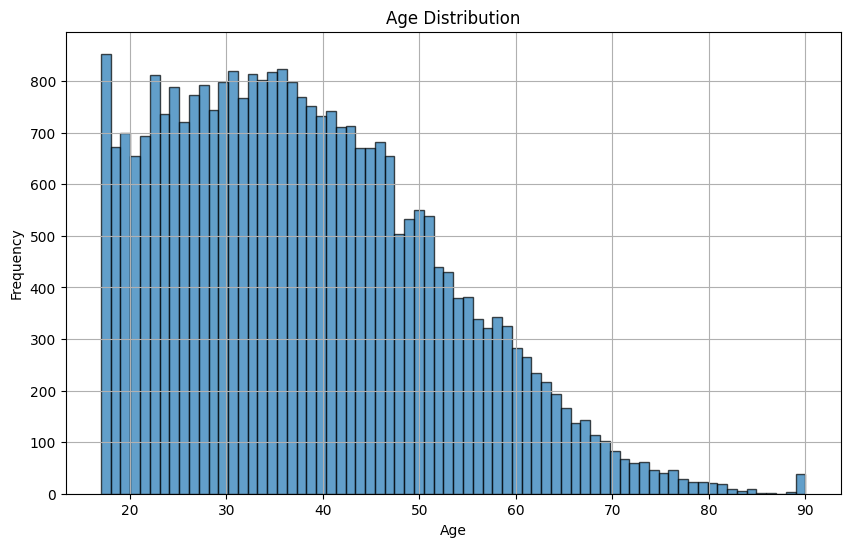

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_dist(original_df, 'age', "Continuous")

###### Employment type

In [ ]:
original_df['employment_type'].value_counts(normalize=True, dropna=False) # I am never droping NaN, like this I can whether there are some missing values

 Private             0.696700
 Self-emp-not-inc    0.078767
 Local-gov           0.064267
NaN                  0.055900
 State-gov           0.039633
 Self-emp-inc        0.034567
 Federal-gov         0.029567
 Without-pay         0.000433
 Never-worked        0.000167
Name: employment_type, dtype: float64

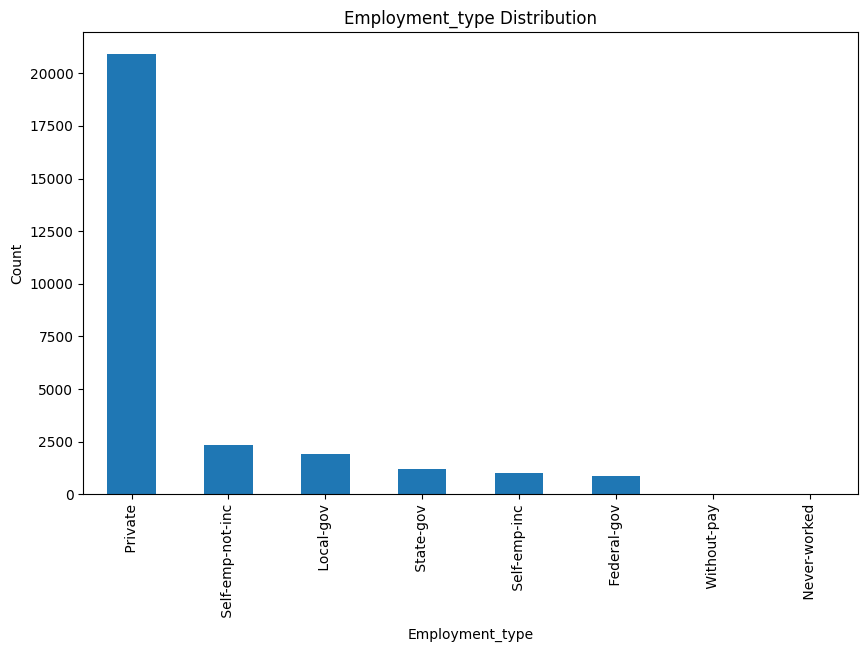

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_dist(original_df, 'employment_type', "Discrete")

###### Weighting factor

In [ ]:
original_df['weighting_factor'].value_counts(normalize=True, dropna=False) # I am never droping NaN, like this I can whether there are some missing values

123011    0.000433
203488    0.000433
113364    0.000400
190290    0.000367
164190    0.000367
            ...   
136226    0.000033
40623     0.000033
236090    0.000033
60193     0.000033
77516     0.000033
Name: weighting_factor, Length: 20433, dtype: float64

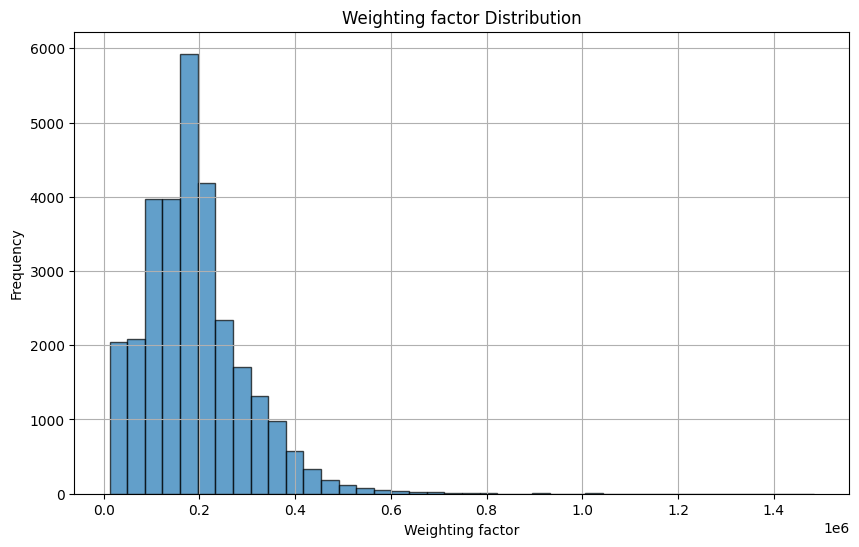

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(original_df['weighting_factor'], bins=40, edgecolor='k', alpha=0.7)
plt.title('Weighting factor Distribution')
plt.xlabel('Weighting factor')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

###### Education level
- High correlation between education level and schooling?
- It might not be interesting to keep both features if they bring very similar information.
- The L1 regularizer for the Support Vector Machine Classifier as well as the sequential feature selection algorithm will decide what to keep or not.

In [ ]:
original_df['education_level'].value_counts(normalize=True, dropna=False) # I am never droping NaN, like this I can whether there are some missing values

 HS-grad         0.323067
 Some-college    0.224100
 Bachelors       0.165433
 Masters         0.052533
 Assoc-voc       0.042000
 11th            0.036133
 Assoc-acdm      0.032300
 10th            0.028600
 7th-8th         0.020133
 Prof-school     0.017500
 9th             0.015733
 12th            0.012867
 Doctorate       0.012733
 5th-6th         0.010333
 1st-4th         0.005000
 Preschool       0.001533
Name: education_level, dtype: float64

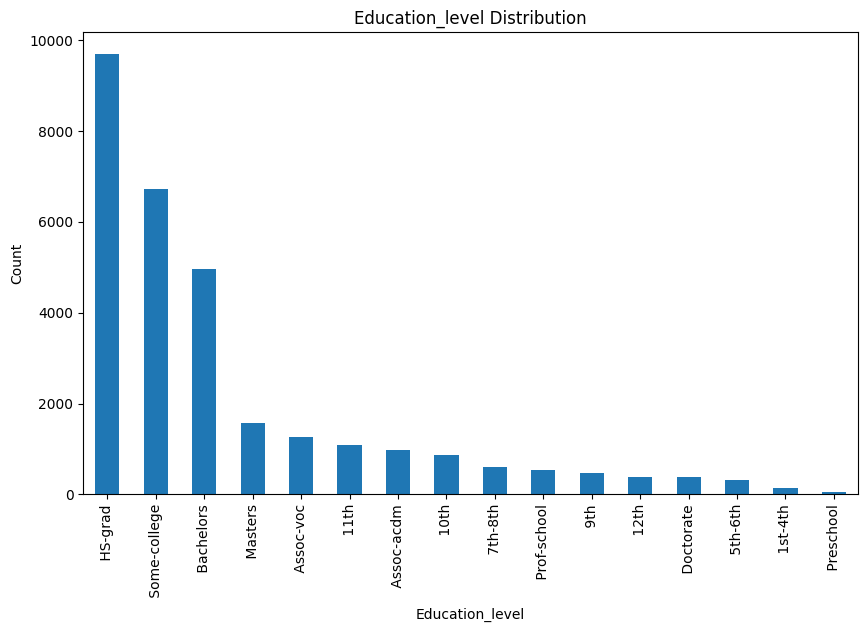

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_dist(original_df,'education_level', Type = "Discrete")

###### Schooling
- High correlation between education level and schooling?
- It might not be interesting to keep both features if they bring very similar information.
- The L1 regularizer for the Support Vector Machine Classifier as well as the sequential feature selection algorithm will decide what to keep or not.

In [ ]:
original_df['schooling'].value_counts(normalize=True, dropna=False) # I am never droping NaN, like this I can whether there are some missing values

9     0.323067
10    0.224100
13    0.165433
14    0.052533
11    0.042000
7     0.036133
12    0.032300
6     0.028600
4     0.020133
15    0.017500
5     0.015733
8     0.012867
16    0.012733
3     0.010333
2     0.005000
1     0.001533
Name: schooling, dtype: float64

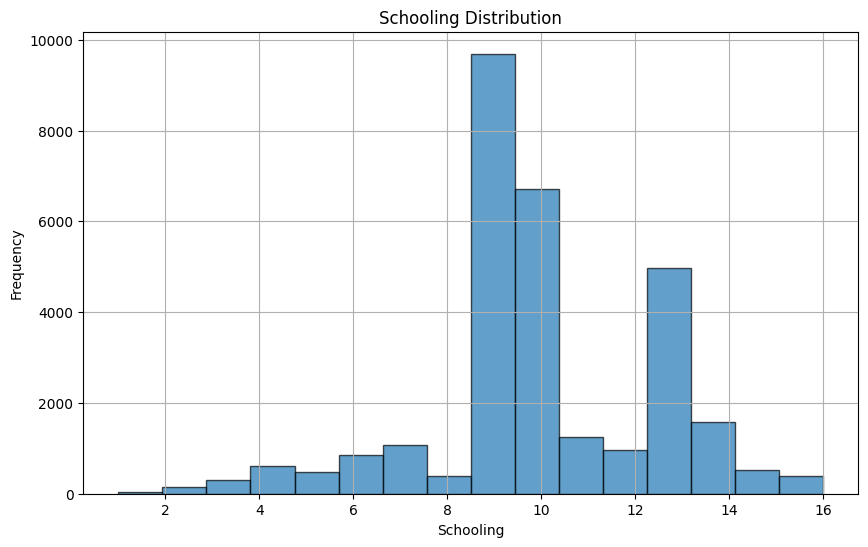

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_dist(original_df,'schooling', Type = "Continuous")

###### Marital status
- High correlation between marital status and partnership?
- It might not be interesting to keep both features if they bring very similar information.
- The L1 regularizer for the Support Vector Machine Classifier as well as the sequential feature selection algorithm will decide what to keep or not.

In [ ]:
original_df['marital_status'].value_counts(normalize=True, dropna=False) # I am never droping NaN, like this I can whether there are some missing values

 Married-civ-spouse       0.458933
 Never-married            0.328333
 Divorced                 0.136733
 Separated                0.031767
 Widowed                  0.030633
 Married-spouse-absent    0.012833
 Married-AF-spouse        0.000767
Name: marital_status, dtype: float64

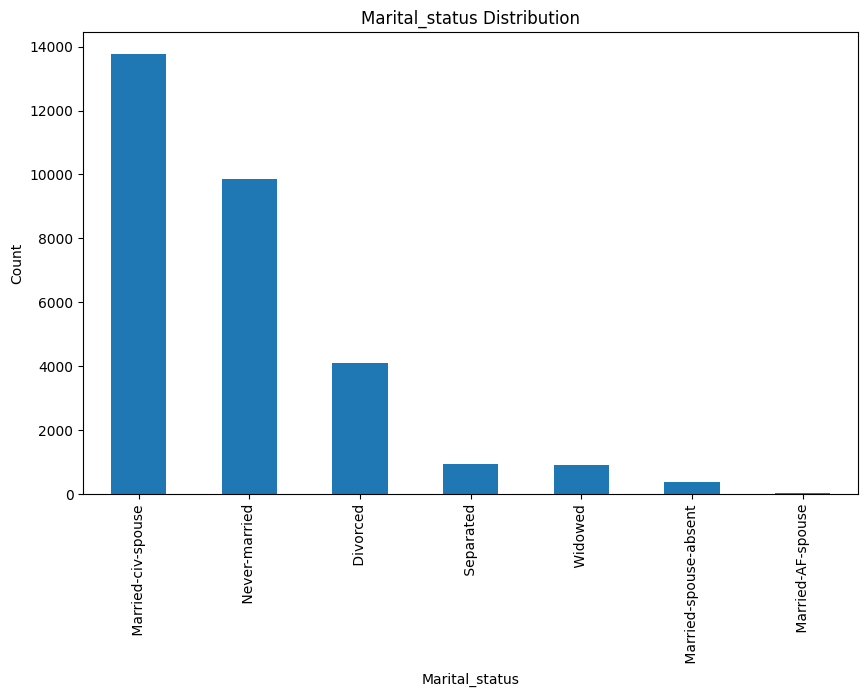

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_dist(original_df,'marital_status', Type = "Discrete")

###### Employment area

In [ ]:
original_df['employment_area'].value_counts(normalize=True, dropna=False) # I am never droping NaN, like this I can whether there are some missing values

 Prof-specialty       0.126733
 Craft-repair         0.126133
 Exec-managerial      0.124533
 Adm-clerical         0.116900
 Sales                0.112333
 Other-service        0.101467
 Machine-op-inspct    0.061533
NaN                   0.056067
 Transport-moving     0.049100
 Handlers-cleaners    0.041733
 Farming-fishing      0.030433
 Tech-support         0.028533
 Protective-serv      0.019433
 Priv-house-serv      0.004800
 Armed-Forces         0.000267
Name: employment_area, dtype: float64

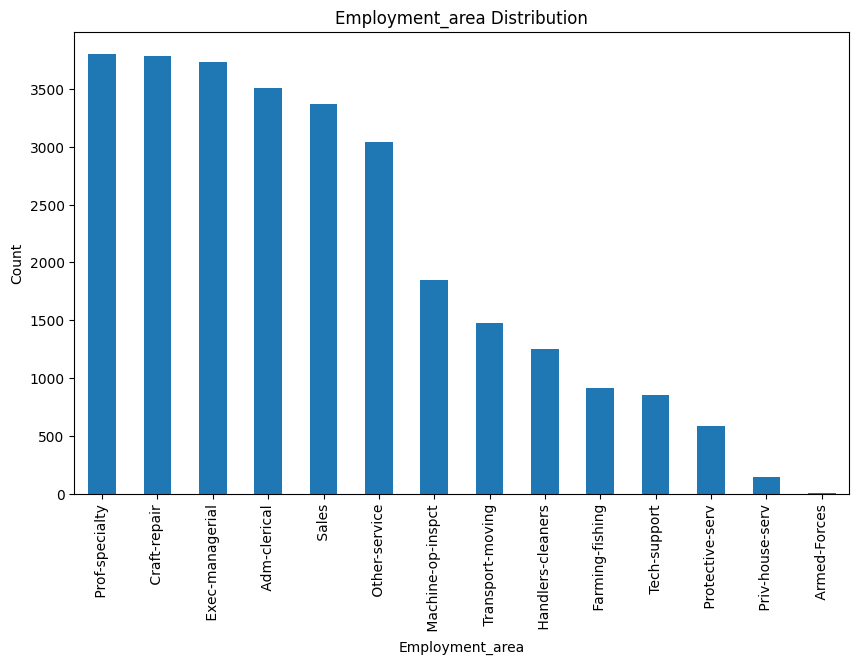

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_dist(original_df,'employment_area', Type = "Discrete")

###### Partnership
- High correlation between marital status and partnership?
- It might not be interesting to keep both features if they bring very similar information.
- The L1 regularizer for the Support Vector Machine Classifier as well as the sequential feature selection algorithm will decide what to keep or not.

In [ ]:
original_df['partnership'].value_counts(normalize=True, dropna=False) # I am never droping NaN, like this I can whether there are some missing values

 Husband           0.404600
 Not-in-family     0.255533
 Own-child         0.155800
 Unmarried         0.105733
 Wife              0.048067
 Other-relative    0.030267
Name: partnership, dtype: float64

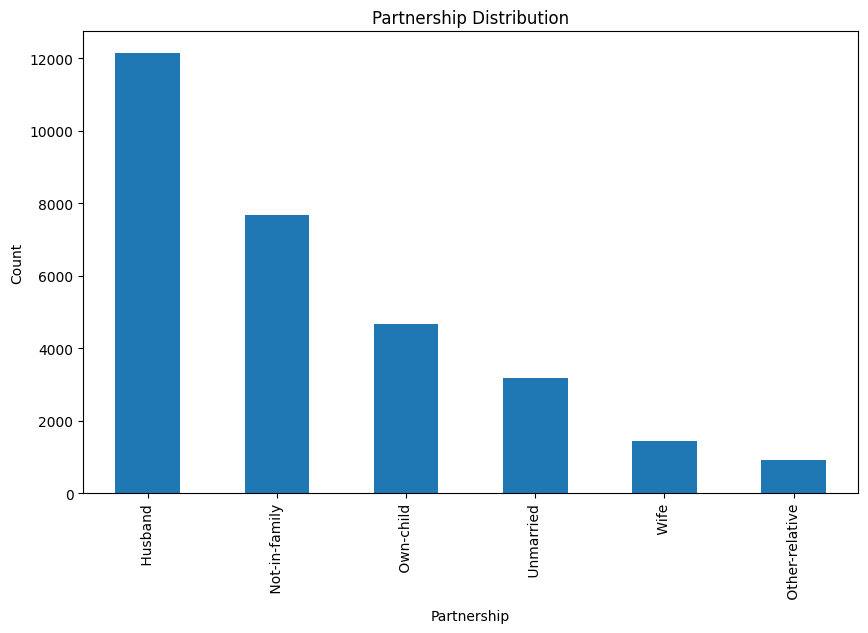

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_dist(original_df,'partnership', Type = "Discrete")

###### Ethnicity

In [ ]:
original_df['ethnicity'].value_counts(normalize=True, dropna=False) # I am never droping NaN, like this I can whether there are some missing values

 White                 0.854533
 Black                 0.095767
 Asian-Pac-Islander    0.031767
 Amer-Indian-Eskimo    0.009600
 Other                 0.008333
Name: ethnicity, dtype: float64

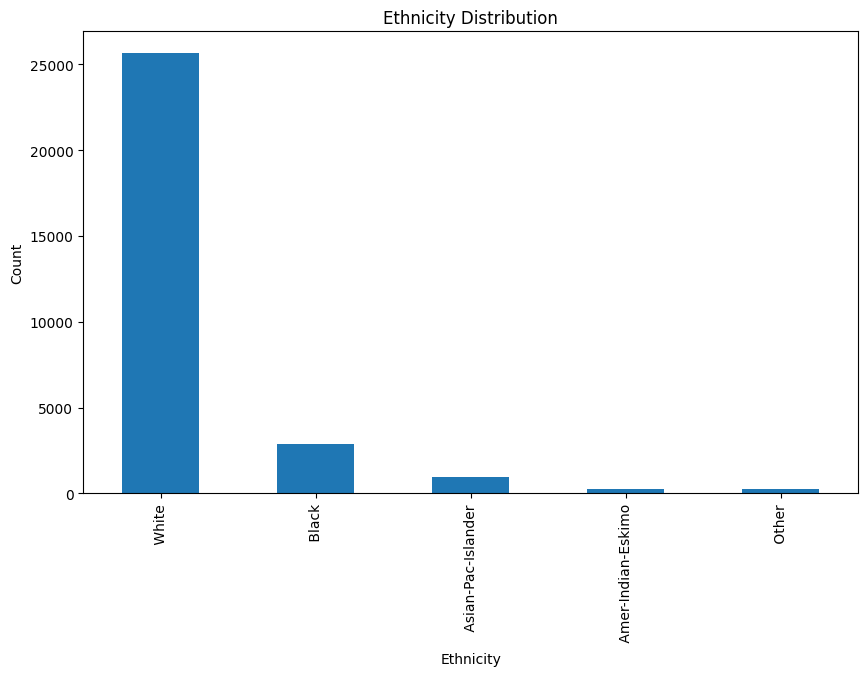

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_dist(original_df,'ethnicity', Type = "Discrete")

###### Gender

In [ ]:
original_df['gender'].value_counts(normalize=True, dropna=False) # I am never droping NaN, like this I can whether there are some missing values

 Male      0.669
 Female    0.331
Name: gender, dtype: float64

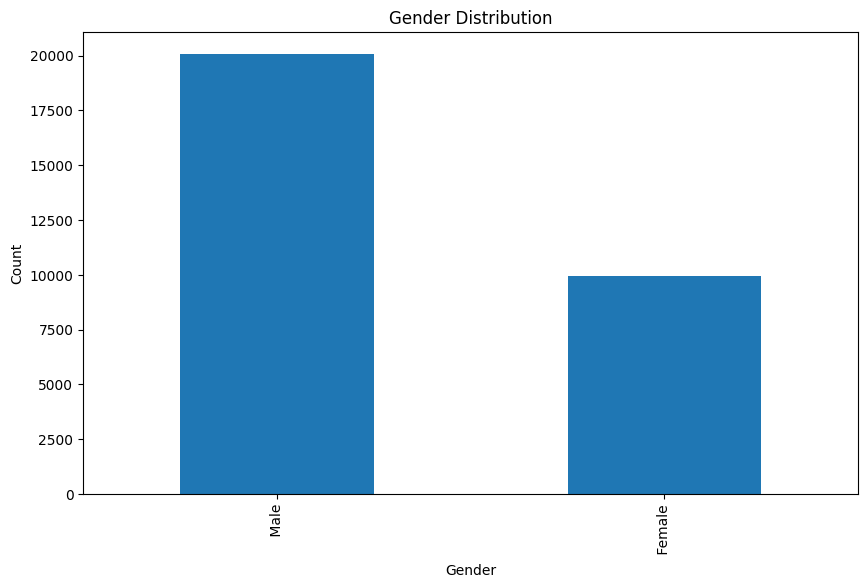

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_dist(original_df,'gender', Type = "Discrete")

###### Country of birth

In [ ]:
original_df['country_of_birth'].value_counts(normalize=True, dropna=False) # I am never droping NaN, like this I can whether there are some missing values

 United-States                 0.895700
 Mexico                        0.020067
NaN                            0.017967
 Philippines                   0.005900
 Germany                       0.004067
 Canada                        0.003833
 Puerto-Rico                   0.003733
 El-Salvador                   0.003200
 India                         0.003133
 England                       0.002900
 Cuba                          0.002900
 South                         0.002533
 Jamaica                       0.002433
 China                         0.002267
 Vietnam                       0.002067
 Italy                         0.002067
 Dominican-Republic            0.002067
 Guatemala                     0.002000
 Japan                         0.001867
 Poland                        0.001867
 Columbia                      0.001833
 Taiwan                        0.001600
 Haiti                         0.001333
 Iran                          0.001333
 Portugal                      0.001100


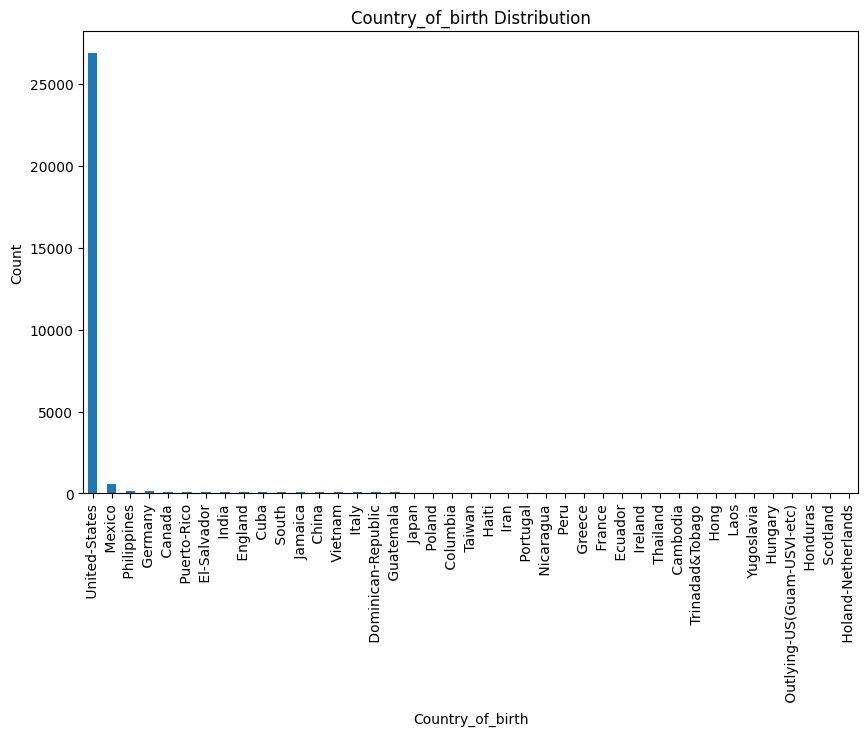

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_dist(original_df,'country_of_birth', Type = "Discrete")

###### Gains

In [ ]:
original_df['gains'].value_counts(normalize=True, dropna=False) # I am never droping NaN, like this I can whether there are some missing values

0        0.916433
15024    0.010733
7688     0.008567
7298     0.007500
99999    0.005000
           ...   
2538     0.000033
1111     0.000033
4931     0.000033
22040    0.000033
2387     0.000033
Name: gains, Length: 118, dtype: float64

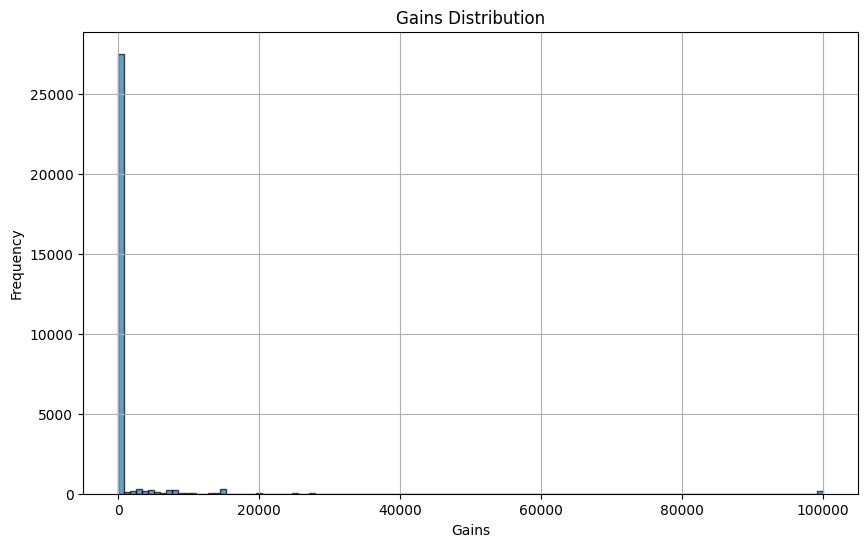

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_dist(original_df,'gains', Type = "Continuous")

###### Losses

In [ ]:
original_df['losses'].value_counts(normalize=True, dropna=False) # I am never droping NaN, like this I can whether there are some missing values

0       0.953733
1902    0.006100
1977    0.005233
1887    0.004533
1848    0.001533
          ...   
1539    0.000033
3004    0.000033
1844    0.000033
2489    0.000033
2472    0.000033
Name: losses, Length: 91, dtype: float64

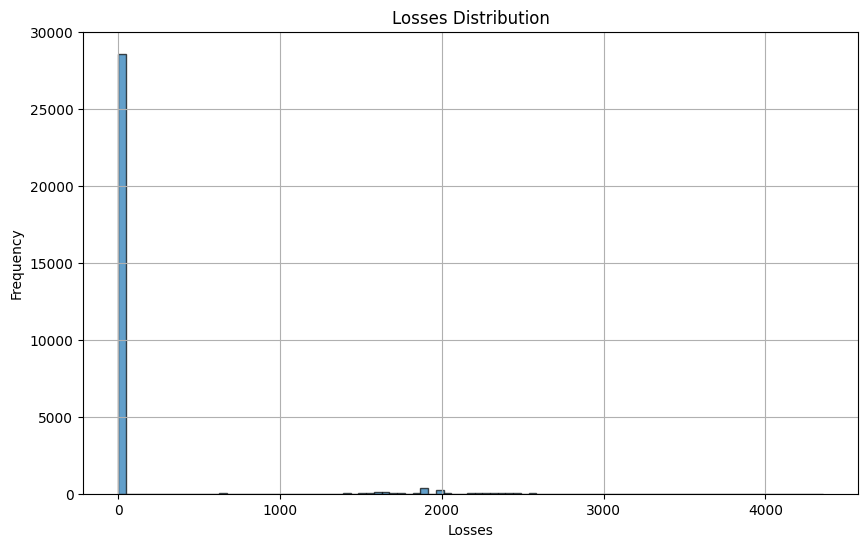

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_dist(original_df,'losses', Type = "Continuous")

###### Weekly working time

In [ ]:
original_df['wk_working_time'].value_counts(normalize=True, dropna=False) # I am never droping NaN, like this I can whether there are some missing values

40    0.469233
50    0.086633
45    0.055967
60    0.045000
35    0.039767
        ...   
94    0.000033
89    0.000033
92    0.000033
74    0.000033
87    0.000033
Name: wk_working_time, Length: 94, dtype: float64

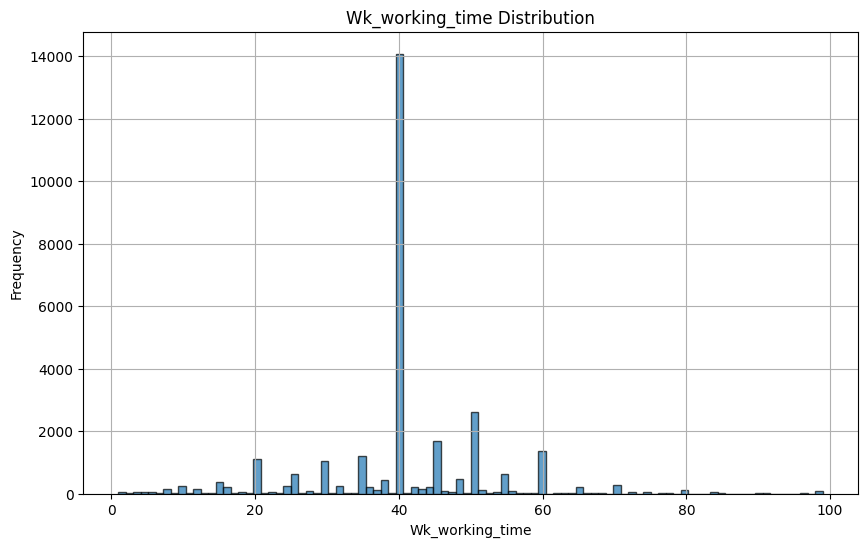

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_dist(original_df,'wk_working_time', Type = "Continuous")

### More data preprocessing

Here I am defininng a one-hot-encoding function for the discrete values.
Regarding the missing values, only 3 discrete features have missing values. Thus, for these features I am creating a new NaN column using the function below.

In [ ]:
# Using one hot encoding for non-numeric columns
def one_hot_encoding(dataframe, dataframe_column, column, nan):
    """
    Parameters:
    dataframe: the dataframe that has the column for which one hot encoding should be used
    dataframe_column: dataframe["column_name"]
    column: "column name"
    nan: set it to True, or to False. If true, it also create a NaN column

    Returns:
    the dataframe with one hot encoding columns
    """

    # Create a separate dataframe for the "income" column
    # Drop the "income" column from the original dataframe
    # so as to keep the column "income at the end of the dataframe"
    income_df = dataframe[["income"]]
    dataframe = dataframe.drop(columns=["income"])

    # Create one-hot encoded columns using get_dummies function
    o_h_e_column = pd.get_dummies(dataframe_column, drop_first=True, dummy_na=nan)
    o_h_e_column = o_h_e_column.replace({True: 1, False: 0})
    # Drops the one hot encoded column from the dataset (drop_first not working)
    dataframe = dataframe.drop(columns=[column])

    # gather the column names from the o_h_e_column df
    # and rename them by adding the name of the original column in front of it
    new_column_names = {col: f"{column}-{col}" for col in o_h_e_column.columns}
    o_h_e_column = o_h_e_column.rename(columns=new_column_names)

    return pd.concat([dataframe, o_h_e_column, income_df], axis=1)

Here, I am using the one hot encoding function I created.

In [ ]:
df = one_hot_encoding(df, df['employment_type'], 'employment_type', True) #If true, it also create a NaN column
df = one_hot_encoding(df, df['education_level'], 'education_level', False)
df = one_hot_encoding(df, df['marital_status'], 'marital_status', False)
df = one_hot_encoding(df, df['employment_area'], 'employment_area', True) #If true, it also create a NaN column
df = one_hot_encoding(df, df['partnership'], 'partnership', False)
df = one_hot_encoding(df, df['ethnicity'], 'ethnicity', False)
df = one_hot_encoding(df, df['gender'], 'gender', False)
df = one_hot_encoding(df, df['country_of_birth'], 'country_of_birth', True) #If true, it also create a NaN column

Here I splitted the one-hot-encoded dataframe into 2 dataframes.
- One dataframe for the instances that have a class label associated to them
- one dataframe for the instances for which I will predict their class label at the end (in the final model section).

In [ ]:
# Split the dataframe into 2 dataframes:
to_predict_once_model_ready = df.loc[df['income'].isna()] # These are all the instances without class label y
df= df[(df.iloc[:, -1] == 0) | (df.iloc[:, -1] == 1)] #use to create the model because these instance have a class label y
df.reset_index(inplace=True, drop=True) #removing the old index and creates a new one

X = df.drop("income", axis='columns')
y = df.income

###### Baseline score

Here I looked at the target variabel distribution and whether there was a class imbalance.

We can see that there is a slight class imbalance. Thus, let's take into account the roc_auc score and not only the accuracy score for the model evaluation.

Reminder:
- class label <=50K coded as 1 (that is the majority class)
- class label >50K coded as 0

1.0    0.7558
0.0    0.2442
Name: income, dtype: float64


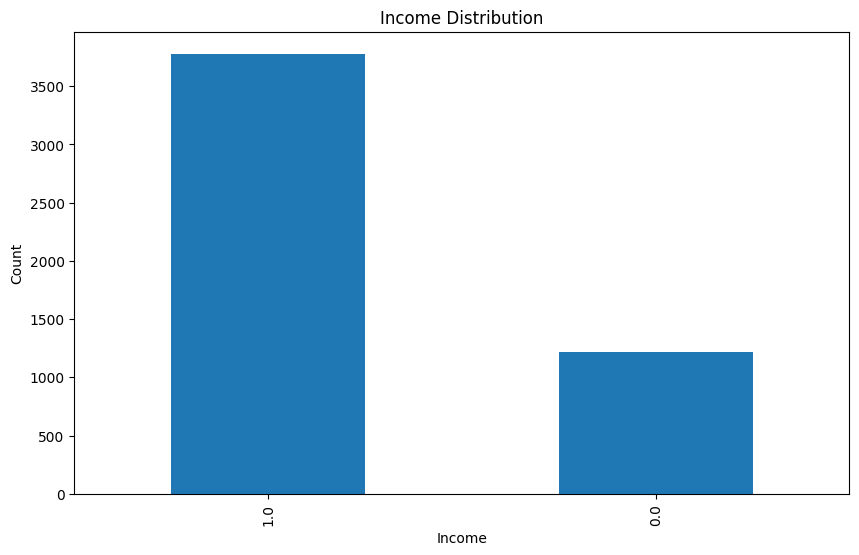

<Figure size 640x480 with 0 Axes>

In [ ]:
# Is there a class imbalance?
print(df['income'].value_counts(normalize=True, dropna=False))
plot_dist(df,'income', Type = "Discrete")

For model evaluation, I picked both the accuracy metric and the ROC AUC metric.
I wanted the look at which score they would return if the model was only predicting the majority class. By doing so, it gives me a better idea of what my model performance will mean during cross validation.

In [ ]:
# Baseline score. Here is the accuracy and auc_roc score that this model get if we predict only the majority class:
# ' <=50K' is coded as 1, that's the majority class.

print(accuracy_score(df['income'], np.ones_like(df['income'])))
print(roc_auc_score(df['income'], np.ones_like(df['income'])))

0.7558
0.5


Because of the class imbalance, the accuracy score might not be reliable enough for model evaluation. But the class imbalance is not so big neither. It is not 2% vs. 98%, thus I did not want to completely neglect the accuracy metric neither. Therefore, I created my own refit_strategy for hyperparameter tuning (ie. for picking the best hyperparameters to keep for my models).



Here is how the refit_strategy works:
- Once the accuracy score and ROC AUC score are computed for all of the possible hyperparameter combinations, the hyperparameter combinations are sorted in descending order with respect to accuracy (from the highest to the lowest accuracy score), and then in a descending order with respect to the ROC AUC score.
- Then, among the 10 first hyperparameter combinations, the combination with the highest ROC AUC score is picked.


In [ ]:
#Functions print_dataframe and refit_strategy adapted from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py

def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_accuracy, mean_roc_auc, params in zip(
        filtered_cv_results['mean_test_accuracy'],
        filtered_cv_results['mean_test_roc_auc'],
        filtered_cv_results["params"],
    ):
        print(
            f"accuracy: {mean_accuracy:0.5f}, roc_auc: {mean_roc_auc:0.5f}, for {params}"
        )
    print()


def refit_strategy(cv_results):
    """Define the strategy to select the best estimator. Hyperparameter tuning

    The strategy defined here is to sort all results by accuracy and then by ROC AUC,
    and select the model with the best ROC AUC score among the top 10 models.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    # Sort all results by accuracy (descending) and then by ROC AUC (descending)
    sorted_cv_results = cv_results_.sort_values(by=['mean_test_accuracy', "mean_test_roc_auc"], ascending=[False, False])

    # Select the top 10 models based on accuracy and ROC AUC
    top_10_accuracy_cv_results = sorted_cv_results.head(10)

    print("Top 10 models based on accuracy and ROC AUC:")
    print_dataframe(top_10_accuracy_cv_results)

    # Select the model with the best ROC AUC score among the top 10 models
    best_roc_auc_index = top_10_accuracy_cv_results['mean_test_roc_auc'].idxmax()

    print(
        "\nThe selected final model is the one with the best ROC AUC score among the top 10\n"
        "models based on accuracy and ROC AUC:\n"
        f"{top_10_accuracy_cv_results.loc[best_roc_auc_index]}"
    )

    return best_roc_auc_index

# Linear model with a Support Vector Machine classifier



For Support Vector Machine models, values need to be normarlize. Here is my function for normalizing values:

It takes as input:
- df: the dataframe name
- columns_to_normalize: the names of all columns to which apply the normalization

It returns:
- a datframe with the normalized columns

In [ ]:
# A support vector machine classifier needs feature normalization:
# defining a z-score normalization function for continuous features:

def zscore_normalize_columns(df, columns_to_normalize):
    df_copy = df.copy()
    for column in columns_to_normalize:
        if column in df_copy.columns:
            df_copy[column] = stats.zscore(df_copy[column])
    return df_copy

continous_features = ['age', 'weighting_factor', 'schooling', 'gains', 'losses', 'wk_working_time']

The Nested Cross Validation algorithm is the same for both the Support Vector Machine classifier and the Random Forest classifier.

- 1) I defined search spaces (hyperparameters values to look for/to compute the metrics for.)
- 2) I created the indices for the 10 folds of the Cross Validation using the StratifiedKFold function. I picked that function instead of another KFold function since it tries preserve the class imbalance for each of the folds.
- 3) Using those indices I created X_train, X_test, y_train and y_test.
- 4) **For Support Vector Machine only:** I normalized X_train and X_test separately for each folds so as to avoid corrupting the other set.
- 5) **For the 1st fold only (see the if-else statement):** I looked for the best hyperparameters using the GridSearchCV function that performed a 5 folds Cross Validation inside of that 1st fold. I passed the refit_strategy I explained earlier to the GridSearchCV function (see preprocessing section).
- 6) **For the 1st fold only (see the if-else statement):** using the best hyperparameters that the GridSearchCV function returned, I built the model which I passed inside a Sequential Feature Selector algorithm. The scoring strategy for this Sequential Feature Selector algorithm is the ROC_AUC score so as to put a bit more emphasis on this metric compared to the accuracy metric (because of the class imbalance in the dataset, accuracy might not be the most relevant metric). The Sequential Feature Selector algorithm performed a 5-fold Cross Validation inside of this 1st fold. For both SVM models and RF, I tried both a Forward and a Backward Feature Selection. Then, I returned the selected features.
- 7) Once I got the best hyperparameters and the selected features, I evaluated the model performance using the Stratified 10-Folds Cross Validation. In my algorithm, I computed the ROC_AUC and accuracy scores for each of the 10 folds, then I returned the averaged results at the end. These averaged resuls are the Mean Train Accuracy score, the Mean Train ROC AUC score, the Mean Test Accuracy score and finally, the Mean Test ROC AUC score.


**For the 1st fold only (see the if-else statement):** That is a mistake I made. I should have made hyperparameter tuning and feature selection during the 10 folds and not only the 1st fold.

## SVC: Nested CV with forward sequential feature selection

In [ ]:
X = df.drop("income", axis='columns')
y = df.income
n_splits = 10

# Outer cross-validation (for model evaluation)
outer_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2023)

# Create DataFrames to store accuracy and ROC AUC scores
outer_accuracy_scores_df_TRAIN = pd.DataFrame(columns=['accuracy'])
outer_roc_auc_scores_df_TRAIN = pd.DataFrame(columns=['roc_auc'])
outer_accuracy_scores_df_TEST = pd.DataFrame(columns=['accuracy'])
outer_roc_auc_scores_df_TEST = pd.DataFrame(columns=['roc_auc'])

search_space = {
    "penalty": ["l1","l2"], #l1 because not all features might be useful
    "loss": ["squared_hinge"], #convex
    "dual": [False], #solving primal optimization problem because n_samples > n_features
    "C": [0.1, 0.5,1,5,10,50,100], #regularizer strength
    "max_iter": [1000000],
    "verbose": [2]
}

i=1 # Initializing a loop counter

################################################################################
# Perform nested cross-validation
for train_idx, test_idx in outer_cv.split(X,y):
    print(f"####################################FOLD {i}###################################")
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # ## Z-score normalization of continuous features. I normalized the train and test sets separetely to avoid influencing both sets.
    X_train_normalized = zscore_normalize_columns(X_train, continous_features)
    X_test_normalized = zscore_normalize_columns(X_test, continous_features)

    ############################################################################ begining of if else statement
    # if else statement happening on 9/10 of the full dataset
    if i== 1: # If this is the 1st fold, let's find the best hyperparameters, and select the features
      # Inner cross-validation loop to tune hyperparameters
      GS = GridSearchCV(estimator=LinearSVC(random_state=2023),
                        param_grid=search_space,
                        scoring=["accuracy", "roc_auc"],
                        refit=refit_strategy,
                        cv=5,
                        verbose=4)

      GS.fit(X_train_normalized, y_train)

      # Get the best hyperparameters
      best_params = GS.best_params_
      print(f"Here are the best hyperparameters: {best_params}, found during fold {i}")

      # Loop for feature selection using SequentialFeatureSelector
      sfs = SequentialFeatureSelector(LinearSVC(**best_params, random_state=2023),
                                      n_features_to_select='auto',
                                      tol=0.0001,
                                      direction="forward",
                                      scoring="roc_auc",
                                      cv=5) #9/10 divided by 5 and 4/5 used as the search space

      sfs.fit(X_train_normalized, y_train)

      # Get the selected features
      selected_features = X_train_normalized.columns[sfs.get_support()]
      print(selected_features.shape, "features were kept. Here are their names: ", selected_features)
      print("#######################################################################")

      # Build the model:
      model_svc = LinearSVC(**best_params, random_state=2023)
#   ############################################################################ end of if else statement
    # Now that we have hyperparameted and features, let's train the model
    X_train_selected = X_train_normalized[selected_features]
    X_test_selected = X_test_normalized[selected_features]
    model_svc.fit(X_train_selected, y_train)

    # Calculate raw decision function scores (signed distance of a sample to the hyperplane)
    decision_function_scores = model_svc.decision_function(X_test_selected)

    # Use decision_function_scores to manually calculate class probabilities
    # You can apply a sigmoid function to decision function scores to get class probabilities
    # You may need to adjust this calculation based on your specific use case and classifier
    class_probabilities = 1 / (1 + np.exp(-decision_function_scores))

    #  Calculate accuracy and ROC AUC for testing set
    accuracy_score_value_TEST = accuracy_score(y_test, (class_probabilities > 0.5).astype(int))
    roc_auc_score_value_TEST = roc_auc_score(y_test, class_probabilities)
    # Calculate accuracy and ROC AUC for training set
    accuracy_score_value_TRAIN = accuracy_score(y_train, (model_svc.predict(X_train_selected)))
    roc_auc_score_value_TRAIN = roc_auc_score(y_train, model_svc.decision_function(X_train_selected))

  # Store accuracy and ROC AUC scores in the DataFrames
    outer_accuracy_scores_df_TEST = pd.concat([outer_accuracy_scores_df_TEST, pd.DataFrame({'accuracy': [accuracy_score_value_TEST]})])
    outer_roc_auc_scores_df_TEST = pd.concat([outer_roc_auc_scores_df_TEST, pd.DataFrame({'roc_auc': [roc_auc_score_value_TEST]})])
    outer_accuracy_scores_df_TRAIN = pd.concat([outer_accuracy_scores_df_TRAIN, pd.DataFrame({'accuracy': [accuracy_score_value_TRAIN]})])
    outer_roc_auc_scores_df_TRAIN = pd.concat([outer_roc_auc_scores_df_TRAIN, pd.DataFrame({'roc_auc': [roc_auc_score_value_TRAIN]})])

    print(f"Train Accuracy score: {accuracy_score_value_TRAIN:.3f} | Train ROC AUC score: {roc_auc_score_value_TRAIN:.3f} | Test Accuracy score: {accuracy_score_value_TEST:.3f} | Test ROC AUC score: {roc_auc_score_value_TEST:.3f} for fold {i}")

    i = i+1 # Actualizing the loop counter
################################################################################

# Calculate and print the final performance metrics
mean_accuracy_score_TRAIN = outer_accuracy_scores_df_TRAIN['accuracy'].mean()
mean_roc_auc_score_TRAIN = outer_roc_auc_scores_df_TRAIN['roc_auc'].mean()
mean_accuracy_score_TEST = outer_accuracy_scores_df_TEST['accuracy'].mean()
mean_roc_auc_score_TEST = outer_roc_auc_scores_df_TEST['roc_auc'].mean()

print("####################################FINAL RESULTS:###################################")
print(f"Mean Train Accuracy: {mean_accuracy_score_TRAIN:.5f}")
print(f"Mean Train ROC AUC: {mean_roc_auc_score_TRAIN:.5f}")
print(f"Mean Test Accuracy: {mean_accuracy_score_TEST:.5f}")
print(f"Mean Test ROC AUC: {mean_roc_auc_score_TEST:.5f}")
# print("The best hyperparameters for the model are:", best_params)

####################################FOLD 1###################################
Fitting 5 folds for each of 14 candidates, totalling 70 fits
[LibLinear][CV 1/5] END C=0.1, dual=False, loss=squared_hinge, max_iter=1000000, penalty=l1, verbose=2; accuracy: (test=0.841) roc_auc: (test=0.894) total time=   0.2s
[LibLinear][CV 2/5] END C=0.1, dual=False, loss=squared_hinge, max_iter=1000000, penalty=l1, verbose=2; accuracy: (test=0.838) roc_auc: (test=0.893) total time=   0.3s
[LibLinear][CV 3/5] END C=0.1, dual=False, loss=squared_hinge, max_iter=1000000, penalty=l1, verbose=2; accuracy: (test=0.850) roc_auc: (test=0.909) total time=   0.2s
[LibLinear][CV 4/5] END C=0.1, dual=False, loss=squared_hinge, max_iter=1000000, penalty=l1, verbose=2; accuracy: (test=0.843) roc_auc: (test=0.896) total time=   0.2s
[LibLinear][CV 5/5] END C=0.1, dual=False, loss=squared_hinge, max_iter=1000000, penalty=l1, verbose=2; accuracy: (test=0.849) roc_auc: (test=0.911) total time=   0.2s
[LibLinear][CV 1/5] E

### Plot of the results
Here, I am plotting the Train Accuracy score, the Train ROC AUC score, the Test Accuracy score and the Test ROC AUC score for each of the 10 folds.

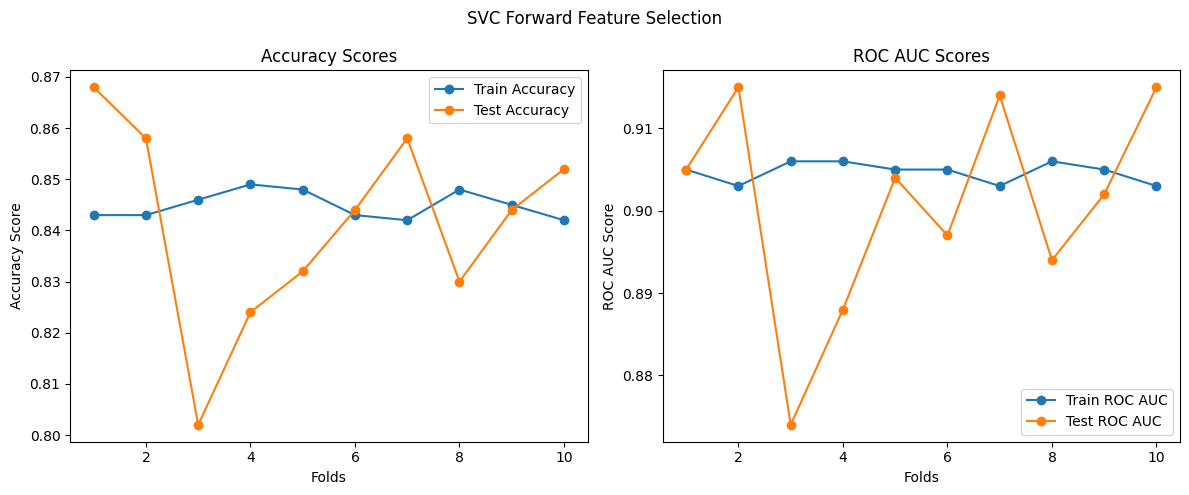

In [ ]:
# data
train_accuracy_scores = [0.843, 0.843, 0.846, 0.849, 0.848, 0.843, 0.842, 0.848, 0.845, 0.842]
test_accuracy_scores = [0.868, 0.858, 0.802, 0.824, 0.832, 0.844, 0.858, 0.830, 0.844, 0.852]
train_roc_auc_scores = [0.905, 0.903, 0.906, 0.906, 0.905, 0.905, 0.903, 0.906, 0.905, 0.903]
test_roc_auc_scores = [0.905, 0.915, 0.874, 0.888, 0.904, 0.897, 0.914, 0.894, 0.902, 0.915]
folds = list(range(1, 11))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) # plot

# for Accuracy Scores
ax1.plot(folds, train_accuracy_scores, marker='o', label='Train Accuracy')
ax1.plot(folds, test_accuracy_scores, marker='o', label='Test Accuracy')
ax1.set_xlabel('Folds')
ax1.set_ylabel('Accuracy Score')
ax1.set_title('Accuracy Scores')
ax1.legend()

# for ROC AUC Scores
ax2.plot(folds, train_roc_auc_scores, marker='o', label='Train ROC AUC')
ax2.plot(folds, test_roc_auc_scores, marker='o', label='Test ROC AUC')
ax2.set_xlabel('Folds')
ax2.set_ylabel('ROC AUC Score')
ax2.set_title('ROC AUC Scores')
ax2.legend()

plt.suptitle('SVC Forward Feature Selection')
plt.tight_layout()
plt.show()

### SVC: Nested CV with backward sequential feature selection

In [ ]:
X = df.drop("income", axis='columns')
y = df.income
n_splits = 10

# Outer cross-validation (for model evaluation)
outer_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2023)

# Create DataFrames to store accuracy and ROC AUC scores
outer_accuracy_scores_df_TRAIN = pd.DataFrame(columns=['accuracy'])
outer_roc_auc_scores_df_TRAIN = pd.DataFrame(columns=['roc_auc'])
outer_accuracy_scores_df_TEST = pd.DataFrame(columns=['accuracy'])
outer_roc_auc_scores_df_TEST = pd.DataFrame(columns=['roc_auc'])

search_space = {
    "penalty": ["l1","l2"], #l1 because not all features might be useful
    "loss": ["squared_hinge"], #convex
    "dual": [False], #solving primal optimization problem because n_samples > n_features
    "C": [0.1, 0.5,1,5,10,50,100], #regularizer strength
    "max_iter": [1000000],
    "verbose": [2]
}

i=1 # Initializing a loop counter

################################################################################
# Perform nested cross-validation
for train_idx, test_idx in outer_cv.split(X,y):
    print(f"####################################FOLD {i}###################################")
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # ## Z-score normalization of continuous features. I normalized the train and test sets separetely to avoid influencing both sets.
    X_train_normalized = zscore_normalize_columns(X_train, continous_features)
    X_test_normalized = zscore_normalize_columns(X_test, continous_features)

    ############################################################################ begining of if else statement
    # if else statement happening on 9/10 of the full dataset
    if i== 1: # If this is the 1st fold, let's find the best hyperparameters, and select the features
      # Inner cross-validation loop to tune hyperparameters
      GS = GridSearchCV(estimator=LinearSVC(random_state=2023),
                        param_grid=search_space,
                        scoring=["accuracy", "roc_auc"],
                        refit=refit_strategy,
                        cv=5, #9/10 divided by 5 and 4/5 used as the search space
                        verbose=4)

      GS.fit(X_train_normalized, y_train)

      # Get the best hyperparameters
      best_params = GS.best_params_
      print(f"Here are the best hyperparameters: {best_params}, found during fold {i}")

      # Loop for feature selection using SequentialFeatureSelector
      sfs = SequentialFeatureSelector(LinearSVC(**best_params, random_state=2023),
                                      n_features_to_select='auto',
                                      tol=0.0001,
                                      direction="backward",
                                      scoring="roc_auc",
                                      cv=5)

      sfs.fit(X_train_normalized, y_train)

      # Get the selected features
      selected_features = X_train_normalized.columns[sfs.get_support()]
      print(selected_features.shape, "features were kept. Here are their names: ", selected_features)
      print("#######################################################################")

      # Build the model:
      model_svc = LinearSVC(**best_params, random_state=2023)
    ############################################################################ end of if else statement
    # Now that we have hyperparameted and features, let's train the model
    X_train_selected = X_train_normalized[selected_features]
    X_test_selected = X_test_normalized[selected_features]
    model_svc.fit(X_train_selected, y_train)

    # Calculate raw decision function scores (signed distance of a sample to the hyperplane)
    decision_function_scores = model_svc.decision_function(X_test_selected)

    # Use decision_function_scores to manually calculate class probabilities
    # You can apply a sigmoid function to decision function scores to get class probabilities
    # You may need to adjust this calculation based on your specific use case and classifier
    class_probabilities = 1 / (1 + np.exp(-decision_function_scores))

    #  Calculate accuracy and ROC AUC for testing set
    accuracy_score_value_TEST = accuracy_score(y_test, (class_probabilities > 0.5).astype(int))
    roc_auc_score_value_TEST = roc_auc_score(y_test, class_probabilities)
    # Calculate accuracy and ROC AUC for training set
    accuracy_score_value_TRAIN = accuracy_score(y_train, (model_svc.predict(X_train_selected)))
    roc_auc_score_value_TRAIN = roc_auc_score(y_train, model_svc.decision_function(X_train_selected))

  # Store accuracy and ROC AUC scores in the DataFrames
    outer_accuracy_scores_df_TEST = pd.concat([outer_accuracy_scores_df_TEST, pd.DataFrame({'accuracy': [accuracy_score_value_TEST]})])
    outer_roc_auc_scores_df_TEST = pd.concat([outer_roc_auc_scores_df_TEST, pd.DataFrame({'roc_auc': [roc_auc_score_value_TEST]})])
    outer_accuracy_scores_df_TRAIN = pd.concat([outer_accuracy_scores_df_TRAIN, pd.DataFrame({'accuracy': [accuracy_score_value_TRAIN]})])
    outer_roc_auc_scores_df_TRAIN = pd.concat([outer_roc_auc_scores_df_TRAIN, pd.DataFrame({'roc_auc': [roc_auc_score_value_TRAIN]})])

    print(f"Train Accuracy score: {accuracy_score_value_TRAIN:.3f} | Train ROC AUC score: {roc_auc_score_value_TRAIN:.3f} | Test Accuracy score: {accuracy_score_value_TEST:.3f} | Test ROC AUC score: {roc_auc_score_value_TEST:.3f} for fold {i}")

    i = i+1 # Actualizing the loop counter
################################################################################

# Calculate and print the final performance metrics
mean_accuracy_score_TRAIN = outer_accuracy_scores_df_TRAIN['accuracy'].mean()
mean_roc_auc_score_TRAIN = outer_roc_auc_scores_df_TRAIN['roc_auc'].mean()
mean_accuracy_score_TEST = outer_accuracy_scores_df_TEST['accuracy'].mean()
mean_roc_auc_score_TEST = outer_roc_auc_scores_df_TEST['roc_auc'].mean()

print("####################################FINAL RESULTS:###################################")
print(f"Mean Train Accuracy: {mean_accuracy_score_TRAIN:.5f}")
print(f"Mean Train ROC AUC: {mean_roc_auc_score_TRAIN:.5f}")
print(f"Mean Test Accuracy: {mean_accuracy_score_TEST:.5f}")
print(f"Mean Test ROC AUC: {mean_roc_auc_score_TEST:.5f}")
# print("The best hyperparameters for the model are:", best_params)

####################################FOLD 1###################################
Fitting 5 folds for each of 14 candidates, totalling 70 fits
[LibLinear][CV 1/5] END C=0.1, dual=False, loss=squared_hinge, max_iter=1000000, penalty=l1, verbose=2; accuracy: (test=0.841) roc_auc: (test=0.894) total time=   0.2s
[LibLinear][CV 2/5] END C=0.1, dual=False, loss=squared_hinge, max_iter=1000000, penalty=l1, verbose=2; accuracy: (test=0.838) roc_auc: (test=0.893) total time=   0.3s
[LibLinear][CV 3/5] END C=0.1, dual=False, loss=squared_hinge, max_iter=1000000, penalty=l1, verbose=2; accuracy: (test=0.850) roc_auc: (test=0.909) total time=   0.3s
[LibLinear][CV 4/5] END C=0.1, dual=False, loss=squared_hinge, max_iter=1000000, penalty=l1, verbose=2; accuracy: (test=0.843) roc_auc: (test=0.896) total time=   0.2s
[LibLinear][CV 5/5] END C=0.1, dual=False, loss=squared_hinge, max_iter=1000000, penalty=l1, verbose=2; accuracy: (test=0.849) roc_auc: (test=0.911) total time=   0.3s
[LibLinear][CV 1/5] E

### Plot of the results
Here, I am plotting the Train Accuracy score, the Train ROC AUC score, the Test Accuracy score and the Test ROC AUC score for each of the 10 folds.

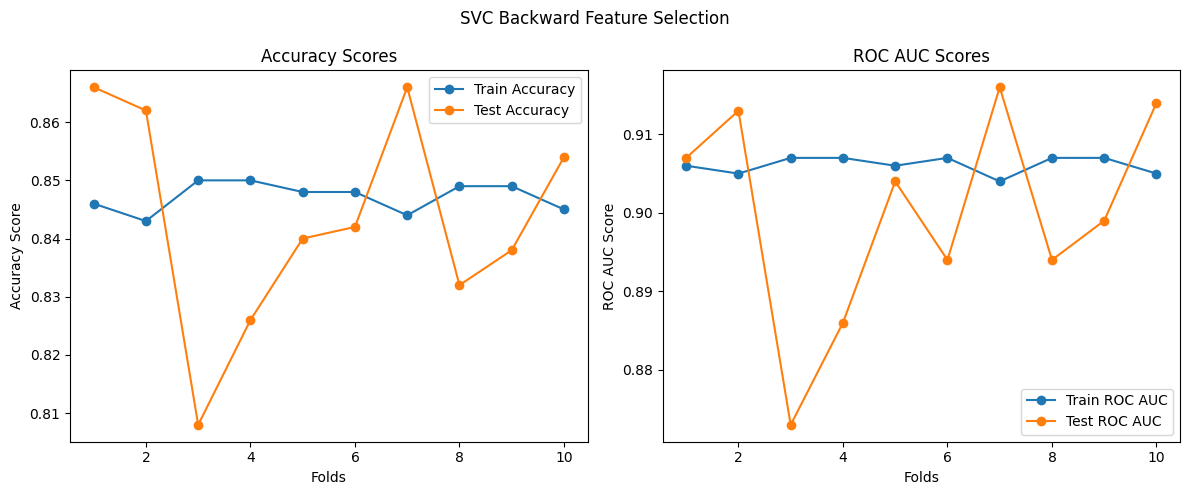

In [ ]:
# data
train_accuracy_scores = [0.846, 0.843, 0.850, 0.850, 0.848, 0.848, 0.844, 0.849, 0.849, 0.845]
test_accuracy_scores = [0.866, 0.862, 0.808, 0.826, 0.840, 0.842, 0.866, 0.832, 0.838, 0.854]
train_roc_auc_scores = [0.906, 0.905, 0.907, 0.907, 0.906, 0.907, 0.904, 0.907, 0.907, 0.905]
test_roc_auc_scores = [0.907, 0.913, 0.873, 0.886, 0.904, 0.894, 0.916, 0.894, 0.899, 0.914]
folds = list(range(1, 11))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) # plot

# for Accuracy Scores
ax1.plot(folds, train_accuracy_scores, marker='o', label='Train Accuracy')
ax1.plot(folds, test_accuracy_scores, marker='o', label='Test Accuracy')
ax1.set_xlabel('Folds')
ax1.set_ylabel('Accuracy Score')
ax1.set_title('Accuracy Scores')
ax1.legend()

# for ROC AUC Scores
ax2.plot(folds, train_roc_auc_scores, marker='o', label='Train ROC AUC')
ax2.plot(folds, test_roc_auc_scores, marker='o', label='Test ROC AUC')
ax2.set_xlabel('Folds')
ax2.set_ylabel('ROC AUC Score')
ax2.set_title('ROC AUC Scores')
ax2.legend()

plt.suptitle('SVC Backward Feature Selection')
plt.tight_layout()
plt.show()

# Random Forest Classifier

The Nested Cross Validation algorithm is the same for both the Support Vector Machine classifier and the Random Forest classifier.

- 1) I defined search spaces (hyperparameters values to look for/to compute the metrics for.)
- 2) I created the indices for the 10 folds of the Cross Validation using the StratifiedKFold function. I picked that function instead of another KFold function since it tries preserve the class imbalance for each of the folds.
- 3) Using those indices I created X_train, X_test, y_train and y_test.
- 4) **For Support Vector Machine only:** I normalized X_train and X_test separately for each folds so as to avoid corrupting the other set.
- 5) **For the 1st fold only (see the if-else statement):** I looked for the best hyperparameters using the GridSearchCV function that performed a 5 folds Cross Validation inside of that 1st fold. I passed the refit_strategy I explained earlier to the GridSearchCV function (see preprocessing section).
- 6) **For the 1st fold only (see the if-else statement):** using the best hyperparameters that the GridSearchCV function returned, I built the model which I passed inside a Sequential Feature Selector algorithm. The scoring strategy for this Sequential Feature Selector algorithm is the ROC_AUC score so as to put a bit more emphasis on this metric compared to the accuracy metric (because of the class imbalance in the dataset, accuracy might not be the most relevant metric). The Sequential Feature Selector algorithm performed a 5-fold Cross Validation inside of this 1st fold. For both SVM models and RF, I tried both a Forward and a Backward Feature Selection. Then, I returned the selected features.
- 7) Once I got the best hyperparameters and the selected features, I evaluated the model performance using the Stratified 10-Folds Cross Validation. In my algorithm, I computed the ROC_AUC and accuracy scores for each of the 10 folds, then I returned the averaged results at the end. These averaged resuls are the Mean Train Accuracy score, the Mean Train ROC AUC score, the Mean Test Accuracy score and finally, the Mean Test ROC AUC score.


**For the 1st fold only (see the if-else statement):** That is a mistake I made. I should have made hyperparameter tuning and feature selection during the 10 folds and not only the 1st fold.

## RF: Nested CV with forward sequential feature selection

In [ ]:
X = df.drop("income", axis='columns')
y = df.income
n_splits = 10

# Outer cross-validation (for model evaluation)
outer_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2023)

# Create DataFrames to store accuracy and ROC AUC scores
outer_accuracy_scores_df_TRAIN = pd.DataFrame(columns=['accuracy'])
outer_roc_auc_scores_df_TRAIN = pd.DataFrame(columns=['roc_auc'])
outer_accuracy_scores_df_TEST = pd.DataFrame(columns=['accuracy'])
outer_roc_auc_scores_df_TEST = pd.DataFrame(columns=['roc_auc'])

# Search grid:
search_space = {
    "criterion": ["entropy"],
    "max_depth": [10, 15, 30, None], #maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    "max_features": ["sqrt", None], #number of features to consider when looking for the best split, If None, then max_features=n_features
    "min_samples_leaf": [2, 3, 5, 10], #minimum number of samples required to be at a leaf node.
    "n_estimators": [250, 500, 750, 1000] #number of trees to be created
}


i=1 # Initializing a loop counter


################################################################################
# Perform nested cross-validation
for train_idx, test_idx in outer_cv.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"####################################FOLD {i}###################################")



    if i== 1: # If this is the first fold, let's find the best hyperparameters, and select the features
      # Inner cross-validation loop to tune hyperparameters
      GS = GridSearchCV(estimator=RandomForestClassifier(random_state=2023),
                        param_grid=search_space,
                        scoring=["accuracy", "roc_auc"],
                        refit=refit_strategy,
                        cv=5,
                        verbose=4)

      GS.fit(X_train, y_train)

      # Get the best hyperparameters
      best_params = GS.best_params_
      print(f"Here are the best hyperparameters: {best_params}, found during fold {i}")

      # Loop for feature selection using SequentialFeatureSelector
      sfs = SequentialFeatureSelector(RandomForestClassifier(**best_params, random_state=2023),
                                      n_features_to_select='auto',
                                      tol=0.0001,
                                      direction="forward",
                                      scoring="roc_auc",
                                      cv=5)

      sfs.fit(X_train, y_train)

      # Get the selected features
      selected_features = X_train.columns[sfs.get_support()]
      print(selected_features.shape, "features were kept. Here are their names: ", selected_features)
      print("#######################################################################")

      # Build the model:
      model = RandomForestClassifier(**best_params, random_state=2023)


    # Now that we have hyperparameted and features, let's train the model
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model.fit(X_train_selected, y_train)

    # Evaluate the model on the test set for accuracy
    accuracy_score_value_TRAIN = accuracy_score(y_train, model.predict(X_train_selected))
    accuracy_score_value_TEST = accuracy_score(y_test, model.predict(X_test_selected))
    outer_accuracy_scores_df_TRAIN = pd.concat([outer_accuracy_scores_df_TRAIN, pd.DataFrame({'accuracy': [accuracy_score_value_TRAIN]})])
    outer_accuracy_scores_df_TEST = pd.concat([outer_accuracy_scores_df_TEST, pd.DataFrame({'accuracy': [accuracy_score_value_TEST]})])

    # Evaluate the model on the test set for ROC AUC
    roc_auc_score_value_TRAIN = roc_auc_score(y_train, model.predict_proba(X_train_selected)[:, 1])
    roc_auc_score_value_TEST = roc_auc_score(y_test, model.predict_proba(X_test_selected)[:, 1])
    outer_roc_auc_scores_df_TRAIN = pd.concat([outer_roc_auc_scores_df_TRAIN, pd.DataFrame({'roc_auc': [roc_auc_score_value_TRAIN]})])
    outer_roc_auc_scores_df_TEST = pd.concat([outer_roc_auc_scores_df_TEST, pd.DataFrame({'roc_auc': [roc_auc_score_value_TEST]})])

    print(f"Train Accuracy score: {accuracy_score_value_TRAIN:.3f} | Train ROC AUC score: {roc_auc_score_value_TRAIN:.3f} | Test Accuracy score: {accuracy_score_value_TEST:.3f} | Test ROC AUC score: {roc_auc_score_value_TEST:.3f} for fold {i}")

    i = i+1 # Actualizing the loop counter
################################################################################

# Calculate and print the final performance metrics
mean_accuracy_score_TRAIN = outer_accuracy_scores_df_TRAIN['accuracy'].mean()
mean_roc_auc_score_TRAIN = outer_roc_auc_scores_df_TRAIN['roc_auc'].mean()
mean_accuracy_score_TEST = outer_accuracy_scores_df_TEST['accuracy'].mean()
mean_roc_auc_score_TEST = outer_roc_auc_scores_df_TEST['roc_auc'].mean()

print("####################################FINAL RESULTS:###################################")
print(f"Mean Train Accuracy: {mean_accuracy_score_TRAIN:.5f}")
print(f"Mean Train ROC AUC: {mean_roc_auc_score_TRAIN:.5f}")
print(f"Mean Test Accuracy: {mean_accuracy_score_TEST:.5f}")
print(f"Mean Test ROC AUC: {mean_roc_auc_score_TEST:.5f}")
print("The best hyperparameters for the model are:", best_params)

####################################FOLD 1###################################
Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=250; accuracy: (test=0.838) roc_auc: (test=0.909) total time=   1.4s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=250; accuracy: (test=0.844) roc_auc: (test=0.894) total time=   1.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=250; accuracy: (test=0.839) roc_auc: (test=0.909) total time=   1.1s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=250; accuracy: (test=0.852) roc_auc: (test=0.897) total time=   1.2s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=250; accuracy: (test=0.867) roc_auc: (test=0.924) total time=   1.0s
[CV 1/5] END criterion=e

### Plot of the results
Here, I am plotting the Train Accuracy score, the Train ROC AUC score, the Test Accuracy score and the Test ROC AUC score for each of the 10 folds.

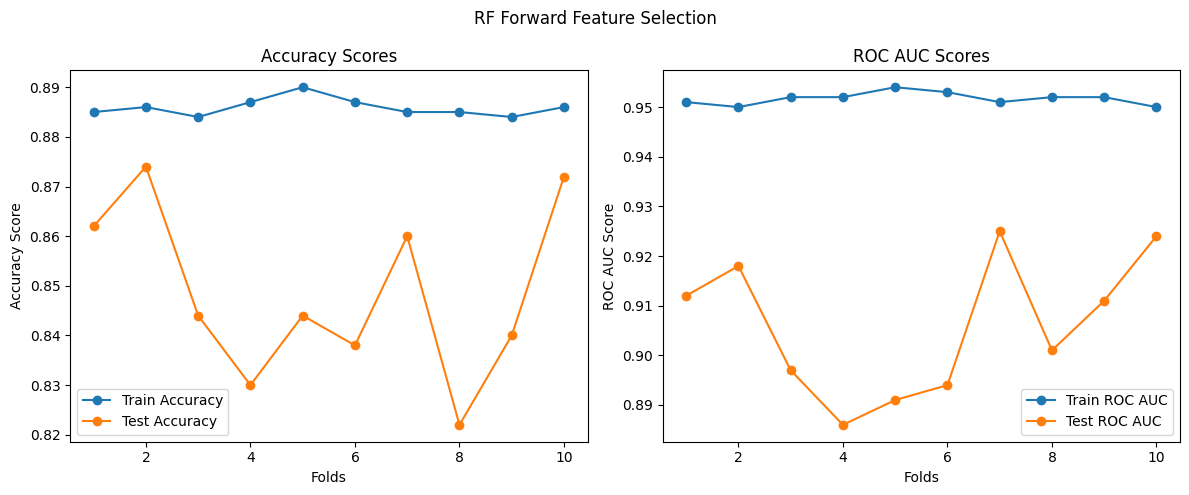

In [ ]:
# data
train_accuracy_scores = [0.885, 0.886, 0.884, 0.887, 0.890, 0.887, 0.885, 0.885, 0.884, 0.886]
test_accuracy_scores = [0.862, 0.874, 0.844, 0.830, 0.844, 0.838, 0.860, 0.822, 0.840, 0.872]
train_roc_auc_scores = [0.951, 0.950, 0.952, 0.952, 0.954, 0.953, 0.951, 0.952, 0.952, 0.950]
test_roc_auc_scores = [0.912, 0.918, 0.897, 0.886, 0.891, 0.894, 0.925, 0.901, 0.911, 0.924]
folds = list(range(1, 11))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) # plot

# for Accuracy Scores
ax1.plot(folds, train_accuracy_scores, marker='o', label='Train Accuracy')
ax1.plot(folds, test_accuracy_scores, marker='o', label='Test Accuracy')
ax1.set_xlabel('Folds')
ax1.set_ylabel('Accuracy Score')
ax1.set_title('Accuracy Scores')
ax1.legend()

# for ROC AUC Scores
ax2.plot(folds, train_roc_auc_scores, marker='o', label='Train ROC AUC')
ax2.plot(folds, test_roc_auc_scores, marker='o', label='Test ROC AUC')
ax2.set_xlabel('Folds')
ax2.set_ylabel('ROC AUC Score')
ax2.set_title('ROC AUC Scores')
ax2.legend()

plt.suptitle('RF Forward Feature Selection')
plt.tight_layout()
plt.show()

## RF: Nested CV with backward sequential feature selection

In [ ]:
X = df.drop("income", axis='columns')
y = df.income
n_splits = 10

# Outer cross-validation (for model evaluation)
outer_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2023)

# Create DataFrames to store accuracy and ROC AUC scores
outer_accuracy_scores_df_TRAIN = pd.DataFrame(columns=['accuracy'])
outer_roc_auc_scores_df_TRAIN = pd.DataFrame(columns=['roc_auc'])
outer_accuracy_scores_df_TEST = pd.DataFrame(columns=['accuracy'])
outer_roc_auc_scores_df_TEST = pd.DataFrame(columns=['roc_auc'])

# Search grid:
search_space = {
    "criterion": ["entropy"],
    "max_depth": [10, 15, 30, None], #maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    "max_features": ["sqrt", None], #number of features to consider when looking for the best split, If None, then max_features=n_features
    "min_samples_leaf": [2, 3, 5, 10], #minimum number of samples required to be at a leaf node.
    "n_estimators": [250, 500, 750, 1000] #number of trees to be created
}


i=1 # Initializing a loop counter


################################################################################
# Perform nested cross-validation
for train_idx, test_idx in outer_cv.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"####################################FOLD {i}###################################")



    if i== 1: # If this is the first fold, let's find the best hyperparameters, and select the features
      # Inner cross-validation loop to tune hyperparameters
      GS = GridSearchCV(estimator=RandomForestClassifier(random_state=2023),
                        param_grid=search_space,
                        scoring=["accuracy", "roc_auc"],
                        refit=refit_strategy,
                        cv=5,
                        verbose=4)

      GS.fit(X_train, y_train)

      # Get the best hyperparameters
      best_params = GS.best_params_
      print(f"Here are the best hyperparameters: {best_params}, found during fold {i}")

      # Loop for feature selection using SequentialFeatureSelector
      sfs = SequentialFeatureSelector(RandomForestClassifier(**best_params, random_state=2023),
                                      n_features_to_select='auto',
                                      tol=0.0001,
                                      direction="backward",
                                      scoring="roc_auc",
                                      cv=5)

      sfs.fit(X_train, y_train)

      # Get the selected features
      selected_features = X_train.columns[sfs.get_support()]
      print(selected_features.shape, "features were kept. Here are their names: ", selected_features)
      print("#######################################################################")

      # Build the model:
      model = RandomForestClassifier(**best_params, random_state=2023)


    # Now that we have hyperparameted and features, let's train the model
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model.fit(X_train_selected, y_train)

    # Evaluate the model on the test set for accuracy
    accuracy_score_value_TRAIN = accuracy_score(y_train, model.predict(X_train_selected))
    accuracy_score_value_TEST = accuracy_score(y_test, model.predict(X_test_selected))
    outer_accuracy_scores_df_TRAIN = pd.concat([outer_accuracy_scores_df_TRAIN, pd.DataFrame({'accuracy': [accuracy_score_value_TRAIN]})])
    outer_accuracy_scores_df_TEST = pd.concat([outer_accuracy_scores_df_TEST, pd.DataFrame({'accuracy': [accuracy_score_value_TEST]})])

    # Evaluate the model on the test set for ROC AUC
    roc_auc_score_value_TRAIN = roc_auc_score(y_train, model.predict_proba(X_train_selected)[:, 1])
    roc_auc_score_value_TEST = roc_auc_score(y_test, model.predict_proba(X_test_selected)[:, 1])
    outer_roc_auc_scores_df_TRAIN = pd.concat([outer_roc_auc_scores_df_TRAIN, pd.DataFrame({'roc_auc': [roc_auc_score_value_TRAIN]})])
    outer_roc_auc_scores_df_TEST = pd.concat([outer_roc_auc_scores_df_TEST, pd.DataFrame({'roc_auc': [roc_auc_score_value_TEST]})])

    print(f"Train Accuracy score: {accuracy_score_value_TRAIN:.3f} | Train ROC AUC score: {roc_auc_score_value_TRAIN:.3f} | Test Accuracy score: {accuracy_score_value_TEST:.3f} | Test ROC AUC score: {roc_auc_score_value_TEST:.3f} for fold {i}")

    i = i+1 # Actualizing the loop counter
################################################################################

# Calculate and print the final performance metrics
mean_accuracy_score_TRAIN = outer_accuracy_scores_df_TRAIN['accuracy'].mean()
mean_roc_auc_score_TRAIN = outer_roc_auc_scores_df_TRAIN['roc_auc'].mean()
mean_accuracy_score_TEST = outer_accuracy_scores_df_TEST['accuracy'].mean()
mean_roc_auc_score_TEST = outer_roc_auc_scores_df_TEST['roc_auc'].mean()

print("####################################FINAL RESULTS:###################################")
print(f"Mean Train Accuracy: {mean_accuracy_score_TRAIN:.5f}")
print(f"Mean Train ROC AUC: {mean_roc_auc_score_TRAIN:.5f}")
print(f"Mean Test Accuracy: {mean_accuracy_score_TEST:.5f}")
print(f"Mean Test ROC AUC: {mean_roc_auc_score_TEST:.5f}")
print("The best hyperparameters for the model are:", best_params)

####################################FOLD 1###################################
Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=250; accuracy: (test=0.838) roc_auc: (test=0.909) total time=   1.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=250; accuracy: (test=0.844) roc_auc: (test=0.894) total time=   1.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=250; accuracy: (test=0.839) roc_auc: (test=0.909) total time=   1.1s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=250; accuracy: (test=0.852) roc_auc: (test=0.897) total time=   1.4s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=250; accuracy: (test=0.867) roc_auc: (test=0.924) total time=   1.9s
[CV 1/5] END criterion=e

### Plot of the results
Here, I am plotting the Train Accuracy score, the Train ROC AUC score, the Test Accuracy score and the Test ROC AUC score for each of the 10 folds.

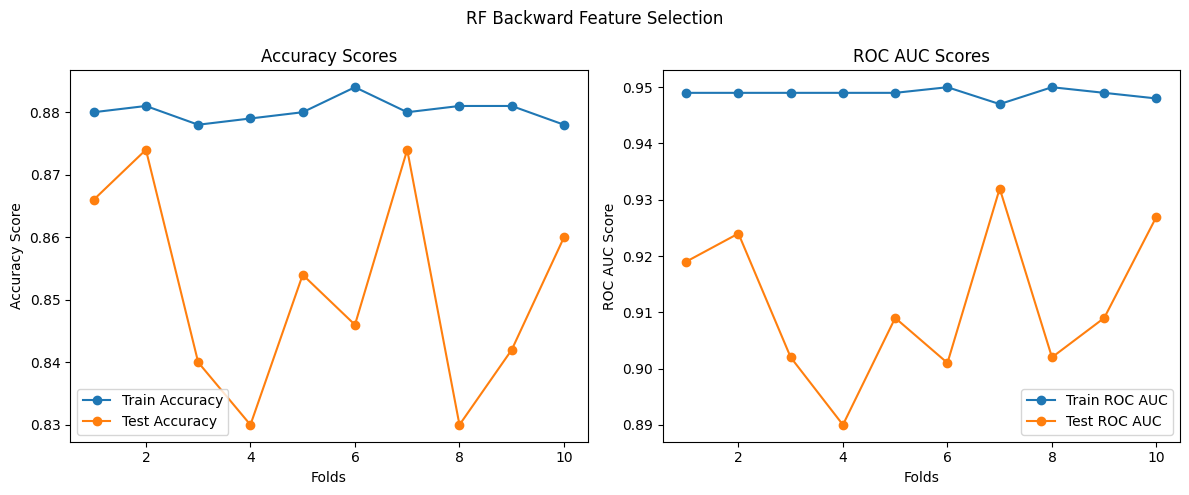

In [ ]:
# data
train_accuracy_scores = [0.880, 0.881, 0.878, 0.879, 0.880, 0.884, 0.880, 0.881, 0.881, 0.878]
test_accuracy_scores = [0.866, 0.874, 0.840, 0.830, 0.854, 0.846, 0.874, 0.830, 0.842, 0.860]
train_roc_auc_scores = [0.949, 0.949, 0.949, 0.949, 0.949, 0.950, 0.947, 0.950, 0.949, 0.948]
test_roc_auc_scores = [0.919, 0.924, 0.902, 0.890, 0.909, 0.901, 0.932, 0.902, 0.909, 0.927]
folds = list(range(1, 11))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) # plot

# for Accuracy Scores
ax1.plot(folds, train_accuracy_scores, marker='o', label='Train Accuracy')
ax1.plot(folds, test_accuracy_scores, marker='o', label='Test Accuracy')
ax1.set_xlabel('Folds')
ax1.set_ylabel('Accuracy Score')
ax1.set_title('Accuracy Scores')
ax1.legend()

# for ROC AUC Scores
ax2.plot(folds, train_roc_auc_scores, marker='o', label='Train ROC AUC')
ax2.plot(folds, test_roc_auc_scores, marker='o', label='Test ROC AUC')
ax2.set_xlabel('Folds')
ax2.set_ylabel('ROC AUC Score')
ax2.set_title('ROC AUC Scores')
ax2.legend()

plt.suptitle('RF Backward Feature Selection')
plt.tight_layout()
plt.show()

# Final model:

Here, I am plotting :
- the Mean Train Accuracy score,
- the Mean Train ROC AUC score,
- the Mean Test Accuracy  score,
- the Mean Test ROC AUC score

for:
- the Support Vector Machine classifier with Forward Feature Selection,
- for the Support Vector Machine classifier with Backward Feature Selection,
- for the Random Forest classifier with Forward Feature Selection,
- for the Random Forest classifier with Backward Feature Selection.

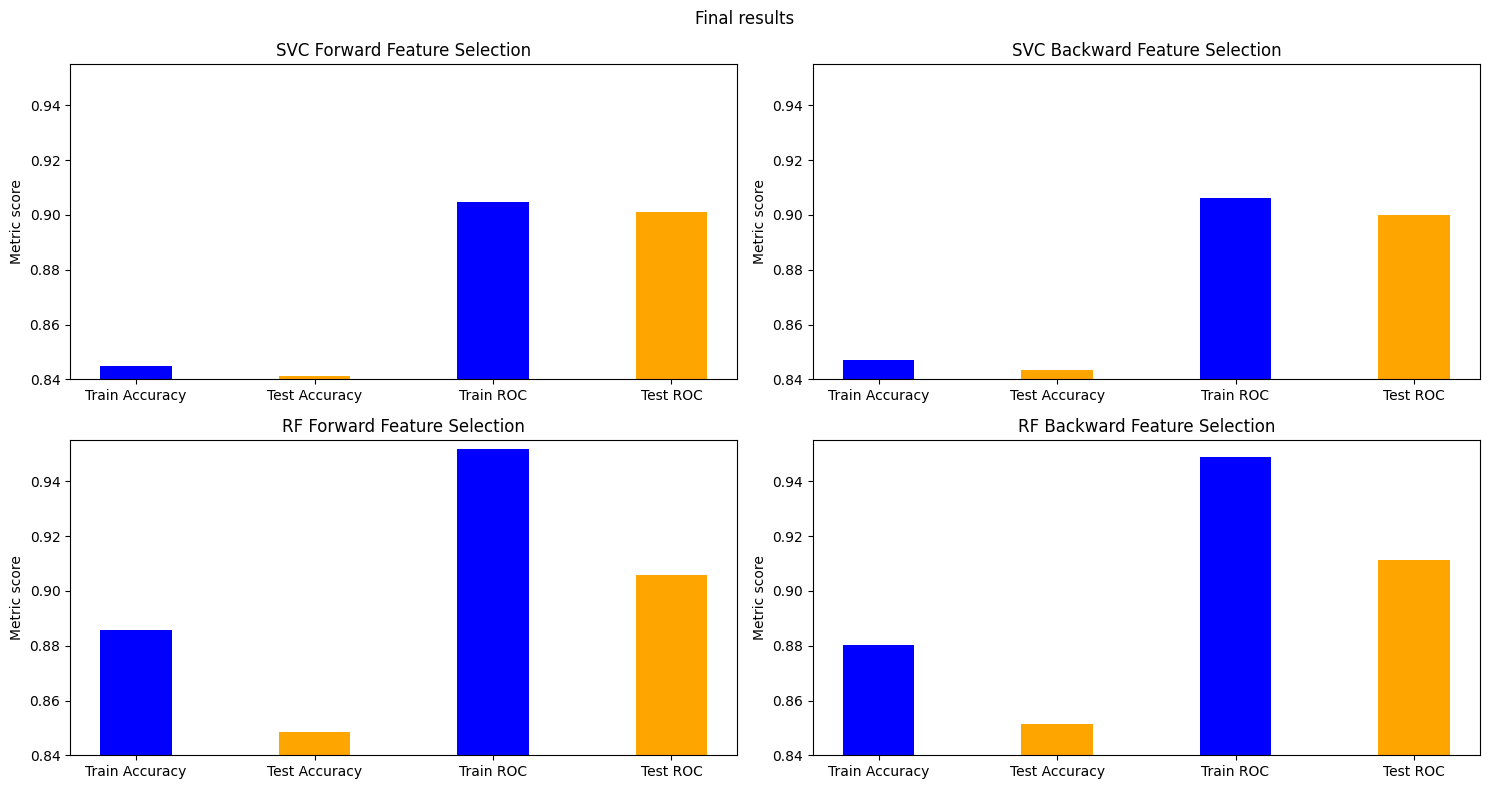

In [ ]:
# metric results:
train_accuracy = {
    "SVC_Forward": 0.84482,
    "SVC_Backward": 0.84713,
    "RF_Forward": 0.88580,
    "RF_Backward": 0.88016,
}


test_accuracy = {
    "SVC_Forward": 0.84120,
    "SVC_Backward": 0.84340,
    "RF_Forward": 0.84860,
    "RF_Backward": 0.85160,
}


train_roc = {
    "SVC_Forward": 0.90474,
    "SVC_Backward": 0.90626,
    "RF_Forward": 0.95174,
    "RF_Backward": 0.94893,
}

test_roc = {
    "SVC_Forward": 0.90092,
    "SVC_Backward": 0.90007,
    "RF_Forward": 0.90586,
    "RF_Backward": 0.91148,
}

#plot
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
x_labels = ["Train Accuracy", "Test Accuracy", "Train ROC", "Test ROC"]
colors = ["blue", "orange", "blue", "orange"]

classifiers = ["SVC", "RF"]
feature_selection = ["Forward", "Backward"]

y_min = 0.840
y_max = 0.955

for i, classifier in enumerate(classifiers):
    for j, fs in enumerate(feature_selection):
        ax = axes[i, j]
        label = f"{classifier} {fs} Feature Selection"
        train_data = [train_accuracy[f"{classifier}_{fs}"], test_accuracy[f"{classifier}_{fs}"], train_roc[f"{classifier}_{fs}"], test_roc[f"{classifier}_{fs}"]]
        x = np.arange(len(x_labels))

        ax.bar(x, train_data, width=0.4, label=label, color=colors)

        ax.set_title(label)
        ax.set_ylabel("Metric score")
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels)
        ax.set_ylim(y_min, y_max)
        ax.legend().set_visible(False) #to remove legend

plt.suptitle('Final results')
plt.tight_layout()
plt.show()


We can see that the Random Forest classifier with Backward Sequential Feature Selection is the model that has the best performance on the test sets:
- Mean Test Accuracy: 0.85160
- Mean Test ROC AUC: 0.91148

## Metric results
The random Random Forest classifier with Backward Sequential Feature Selection is the model with the best scores on the test sets. Therefore, I pick that model to predict the 25 000 missing labels.

In [ ]:
# Best hyperparameters found:
best_params = {'criterion': 'entropy',
               'max_depth': None,
               'max_features': 'sqrt',
               'min_samples_leaf': 3,
               'n_estimators': 500}

selected_features = ['age', 'schooling', 'gains', 'losses', 'wk_working_time',
       'employment_type- Local-gov', 'employment_type- Never-worked',
       'employment_type- Private', 'employment_type- Self-emp-inc',
       'employment_type- Self-emp-not-inc', 'employment_type- State-gov',
       'employment_type- Without-pay', 'employment_type-nan',
       'education_level- 11th', 'education_level- 12th',
       'education_level- 1st-4th', 'education_level- 5th-6th',
       'education_level- 7th-8th', 'education_level- 9th',
       'education_level- Assoc-acdm', 'education_level- Assoc-voc',
       'education_level- Doctorate', 'education_level- HS-grad',
       'education_level- Masters', 'education_level- Preschool',
       'education_level- Prof-school', 'education_level- Some-college',
       'marital_status- Married-AF-spouse',
       'marital_status- Married-civ-spouse',
       'marital_status- Married-spouse-absent',
       'marital_status- Never-married', 'marital_status- Separated',
       'employment_area- Armed-Forces', 'employment_area- Exec-managerial',
       'employment_area- Farming-fishing',
       'employment_area- Handlers-cleaners',
       'employment_area- Machine-op-inspct', 'employment_area- Other-service',
       'employment_area- Priv-house-serv', 'employment_area- Prof-specialty',
       'employment_area- Protective-serv', 'employment_area- Sales',
       'employment_area- Tech-support', 'employment_area- Transport-moving',
       'employment_area-nan', 'partnership- Other-relative',
       'partnership- Own-child', 'partnership- Unmarried', 'partnership- Wife',
       'ethnicity- Asian-Pac-Islander', 'ethnicity- Black', 'ethnicity- Other',
       'ethnicity- White', 'gender- Male', 'country_of_birth- Canada',
       'country_of_birth- China', 'country_of_birth- Columbia',
       'country_of_birth- Cuba', 'country_of_birth- Dominican-Republic',
       'country_of_birth- Ecuador', 'country_of_birth- El-Salvador',
       'country_of_birth- England', 'country_of_birth- France',
       'country_of_birth- Germany', 'country_of_birth- Greece',
       'country_of_birth- Guatemala', 'country_of_birth- Haiti',
       'country_of_birth- Holand-Netherlands', 'country_of_birth- Honduras',
       'country_of_birth- Hong', 'country_of_birth- Hungary',
       'country_of_birth- India', 'country_of_birth- Iran',
       'country_of_birth- Ireland', 'country_of_birth- Italy',
       'country_of_birth- Jamaica', 'country_of_birth- Japan',
       'country_of_birth- Laos', 'country_of_birth- Mexico',
       'country_of_birth- Nicaragua',
       'country_of_birth- Outlying-US(Guam-USVI-etc)',
       'country_of_birth- Peru', 'country_of_birth- Philippines',
       'country_of_birth- Poland', 'country_of_birth- Portugal',
       'country_of_birth- Puerto-Rico', 'country_of_birth- Scotland',
       'country_of_birth- South', 'country_of_birth- Taiwan',
       'country_of_birth- Thailand', 'country_of_birth- Trinadad&Tobago',
       'country_of_birth- United-States', 'country_of_birth- Vietnam',
       'country_of_birth- Yugoslavia', 'country_of_birth-nan']

X_selected = X[selected_features]

In [ ]:
model = RandomForestClassifier(**best_params)
model.fit(X_selected, y)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       n_estimators=500)

Now that I built the Random Forest classifier using the best hyperparameters and the selected features, I can use it to predict the labels of the 25 000 data points without labels:

In [ ]:
to_predict_once_model_ready_before_one_hot_encoding = to_predict_once_model_ready_before_one_hot_encoding.drop("income", axis='columns') # deleting the income columns full of NaN values

to_predict_once_model_ready_selected = to_predict_once_model_ready[selected_features] #using only the features determined earlier
predictions = model.predict(to_predict_once_model_ready_selected) #predicts the labels

to_predict_once_model_ready_before_one_hot_encoding['income'] = predictions
to_predict_once_model_ready_before_one_hot_encoding['income'].replace(1, ' <=50K', inplace=True) #since the model predicts "1"s and "0"s.
to_predict_once_model_ready_before_one_hot_encoding['income'].replace(0, ' >50K', inplace=True)

**Here are the predictions:**

In [ ]:
# Here are the predictions:
to_predict_once_model_ready_before_one_hot_encoding

,age,employment_type,weighting_factor,education_level,schooling,marital_status,employment_area,partnership,ethnicity,gender,gains,losses,wk_working_time,country_of_birth,income
4999,47,Self-emp-inc,79627,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,27828,0,50,United-States,>50K
5000,55,Private,151474,Bachelors,13,Never-married,Tech-support,Other-relative,White,Female,0,1590,38,United-States,<=50K
5001,26,Private,132661,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,5013,0,40,United-States,<=50K
5002,28,Private,161674,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
5003,36,Private,62346,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,30,Private,55481,Masters,14,Never-married,Tech-support,Unmarried,White,Male,0,0,45,Nicaragua,<=50K
29995,48,Private,119471,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,56,Philippines,<=50K
29996,61,Local-gov,167347,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,United-States,<=50K
29997,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K


**Here is a plot of the predictions:**

 <=50K    0.82576
 >50K     0.17424
Name: income, dtype: float64


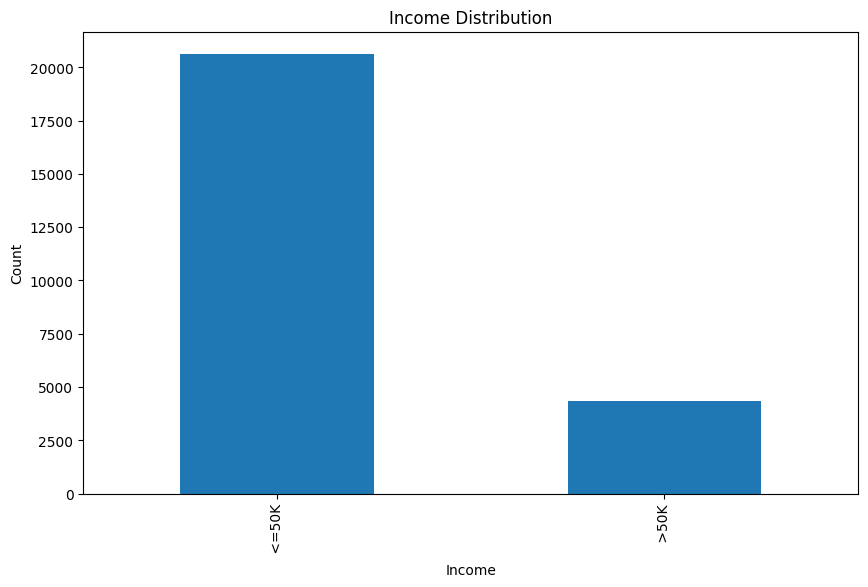

<Figure size 640x480 with 0 Axes>

In [ ]:
print(to_predict_once_model_ready_before_one_hot_encoding['income'].value_counts(normalize=True, dropna=False))
plot_dist(to_predict_once_model_ready_before_one_hot_encoding,'income', Type = "Discrete")